## Exploring the TORCS training data
We have been given a series of files containing driving data from a car, including sensor data and controller (output) data. Before creating any model that could learn to drive using this data, let's examine it.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Let's peek into the aalborg.csv file first:

In [12]:
!head alpine-1.csv -n 3

ACCELERATION,BRAKE,STEERING,SPEED,TRACK_POSITION,ANGLE_TO_TRACK_AXIS,TRACK_EDGE_0,TRACK_EDGE_1,TRACK_EDGE_2,TRACK_EDGE_3,TRACK_EDGE_4,TRACK_EDGE_5,TRACK_EDGE_6,TRACK_EDGE_7,TRACK_EDGE_8,TRACK_EDGE_9,TRACK_EDGE_10,TRACK_EDGE_11,TRACK_EDGE_12,TRACK_EDGE_13,TRACK_EDGE_14,TRACK_EDGE_15,TRACK_EDGE_16,TRACK_EDGE_17
1.0,0.0,-0.0027149565360348937,0.0,0.333334,3.01992E-7,3.99999,4.0617,4.2567,4.6188,5.22162,6.22289,7.99999,11.6952,23.0351,200.0,46.0701,23.3904,16.0,12.4458,10.4433,9.23761,8.51343,8.12342,8.00001
1.0,0.0,-0.0027149565360348937,0.0,0.333334,3.01992E-7,3.99999,4.0617,4.2567,4.6188,5.22162,6.22289,7.99999,11.6952,23.0351,200.0,46.0701,23.3904,16.0,12.4458,10.4433,9.23761,8.51343,8.12342,8.00001


In [13]:
data = np.loadtxt("aalborg.csv", skiprows=1, delimiter=",")
print(data.shape)

(4360, 25)


This means we have 4360 data points, each one containing 25 values. As we can see from the column labels, the first three columns correspond to controller actions: acceleration, brake and steering; the rest correspond to sensor data. Let's now visualize the sensor data.

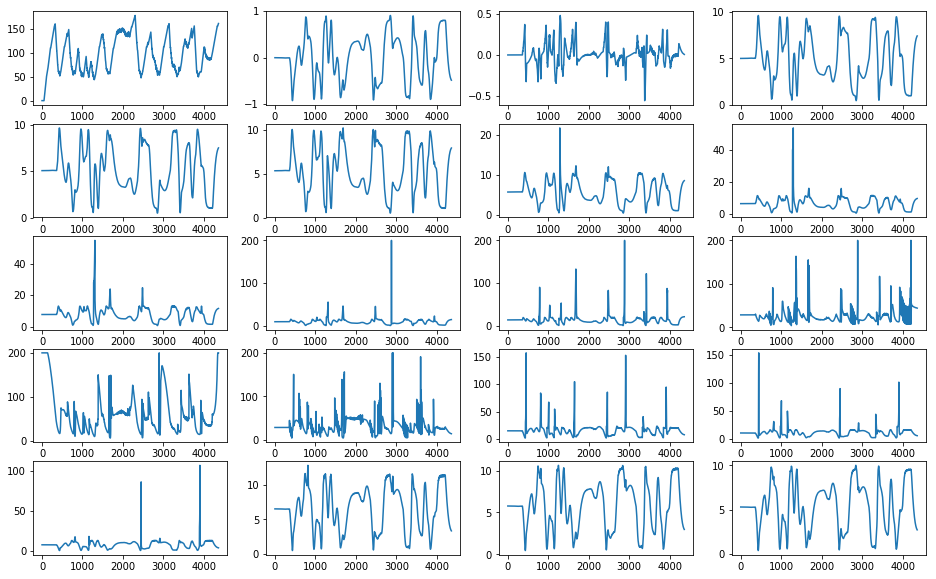

In [14]:
sensors = data[:, 3:]
plt.figure(figsize=(16,10))
for i in range(20):
    plt.subplot(5, 4, i+1)
    plt.plot(sensors[:,i])

As we can see, the sensor data is highly nonlinear with respect to time, and also their magnitudes are in different scales, with some sensors going up to 10 or 20 and other sensors up to 200. Therefore, it might be a good idea to normalize these features before using them as the input to a model. 

This is all concerning input data, which is what is available for training our driver. Nevertheless, it might be interesting to take a look at the control actions given by the winning car. Let's visualize, for example, the acceleration.

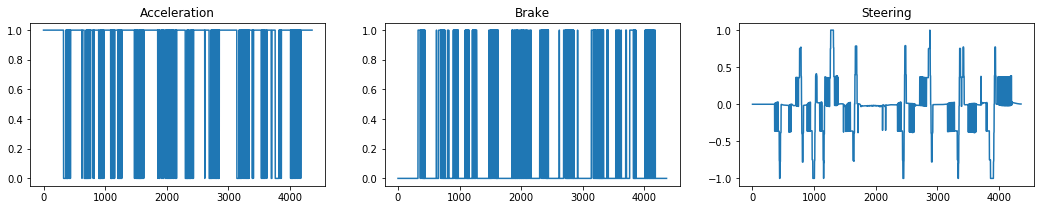

In [15]:
titles = ["Acceleration", "Brake", "Steering"]
plt.figure(figsize=(18, 3))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.plot(data[:, i])
    plt.title(titles[i])

Apparently this is a very rough controller that only sends on-off signals to the acceleration and brake controls, which is why it seems so shaky when turning. Maybe a histogram will help us confirm this.

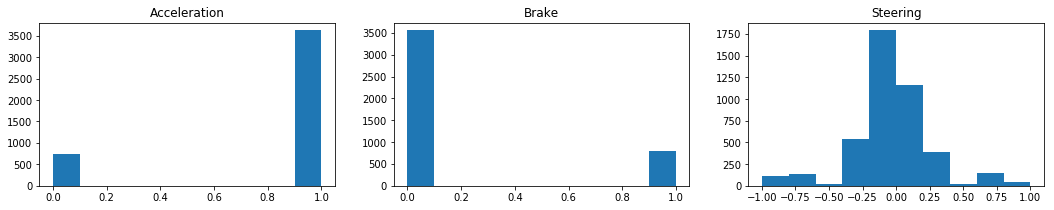

In [16]:
plt.figure(figsize=(18, 3))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.hist(data[:, i])
    plt.title(titles[i])

Last check: are there any acceleration values greater than zero and less than 1?

In [17]:
len(data[np.logical_and(data[:,0] > 0, data[:,0] < 1),:])

0

This is indeed an on-off controller, probably implemented using a classifier.